In [53]:
import numpy as np
import matplotlib.pyplot as plt

bacterial_replication=0.01,
    bacteria_TO_coral_inhibition=0.01,
    coral_replication=0.1,
    algae_coral_inhibition=0.01,
    algae_bacteria_support=0.1,
    viral_replication=0.0,
    virus_bacteria_inhibition=0.0,
    bacteria_virus_support=0.0,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0,
    viral_bacterial_support = 0,
    time_steps=10

In [54]:
def simulate_reef_dynamics(
    bacterial_replication=0.02,
    bacteria_TO_coral_inhibition=0.02,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.0,
    virus_TO_bacteria_inhibition=0.0,
    bacteria_TO_virus_support=0.0,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0,
    viral_TO_bacterial_support = 0,
    time_steps=6
):
    
    """
    Your variable options and defaults are: 
    bacterial_replication=0.01,
    bacteria_TO_coral_inhibition=0.01,
    coral_replication=0.1,
    algae_coral_inhibition=0.01,
    algae_bacteria_support=0.1,
    viral_replication=0.0,
    virus_bacteria_inhibition=0.5,
    bacteria_virus_support=0.5,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0.5,
    time_steps=20
    """
    # Initialize populations
    bacteria = initial_bacteria
    coral = initial_coral
    algae = initial_algae
    virus = initial_virus

    # Track populations over time
    bacteria_counts = [bacteria]
    coral_counts = [coral]
    algae_counts = [algae]
    virus_counts = [virus]

    for _ in range(time_steps):
        # Determine whether virus terms are active
        virus_effect = virus if virus > 0 else 0
        virus_active = virus > 0

        # Bacteria dynamics
        bacteria_new = (
            bacteria
            + (algae * algae_TO_bacteria_support)
            + (bacteria * bacterial_replication)
            - (virus_effect * virus_TO_bacteria_inhibition)
            + (viral_TO_bacterial_support * virus)
        ) if bacteria > 0 else 0

        # Coral dynamics
        if coral > 0: 
            coral_new = (
            coral
            + (coral * coral_replication)
            - (bacteria * bacteria_TO_coral_inhibition)
            - (algae * algae_TO_coral_inhibition) )
        if (coral <= 0 ) or (coral_new <= 0):
            coral_new = 0

        
        if coral_new > 1:
            coral_new = 1
        
            

        # Algae dynamics
        algae_new = max(0, 1 - coral_new) if algae > 0 else 0

        # Virus dynamics
        if virus_active:
            virus_new = (
                virus
                + virus * viral_replication
                + bacteria * bacteria_TO_virus_support
            )
        else:
            virus_new = virus  # stays 0

        # Ensure non-negative values
        bacteria = max(0, bacteria_new)
        coral = max(0, coral_new)
        algae = max(0, algae_new)
        virus = max(0, virus_new)

        # Store updated populations
        bacteria_counts.append(bacteria)
        coral_counts.append(coral)
        algae_counts.append(algae)
        virus_counts.append(virus)

    return bacteria_counts, coral_counts, algae_counts, virus_counts

# Healthy No Virus
    bacterial_replication=0.02,
    bacteria_TO_coral_inhibition=0.02,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.0,
    virus_TO_bacteria_inhibition=0.0,
    bacteria_TO_virus_support=0.0,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0,
    viral_TO_bacterial_support = 0,
    time_steps=6

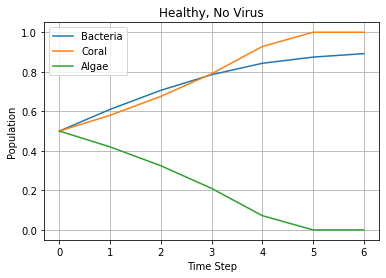

In [55]:
bacteria_counts, coral_counts, algae_counts, virus_counts =  simulate_reef_dynamics()

plt.plot(bacteria_counts, label='Bacteria')
plt.plot(coral_counts, label='Coral')
plt.plot(algae_counts, label='Algae')
#plt.plot(virus_counts, label='Virus')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Healthy, No Virus')
plt.legend()
plt.grid(True)
plt.savefig("/Users/jacob/Desktop/Research/Knowles/Coral Figures/Healthy, No Virus.pdf", format = "pdf")
plt.show()


# Degraded No Virus

    bacterial_replication=0.2,
    bacteria_TO_coral_inhibition=0.2,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.0,
    virus_TO_bacteria_inhibition=0.0,
    bacteria_TO_virus_support=0.0,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0,
    viral_TO_bacterial_support = 0,
    time_steps=6

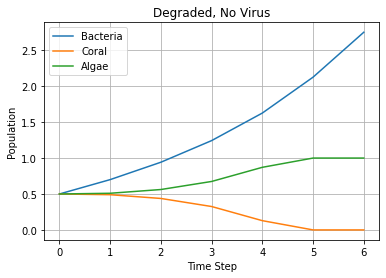

In [56]:
bacteria_counts, coral_counts, algae_counts, virus_counts =  simulate_reef_dynamics(bacterial_replication=0.2,bacteria_TO_coral_inhibition=0.2)

plt.plot(bacteria_counts, label='Bacteria')
plt.plot(coral_counts, label='Coral')
plt.plot(algae_counts, label='Algae')
#plt.plot(virus_counts, label='Virus')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Degraded, No Virus')
plt.legend()
plt.grid(True)
plt.savefig("/Users/jacob/Desktop/Research/Knowles/Coral Figures/Degraded, No Virus.pdf", format = "pdf")
plt.show()

# Healthy With Virus

    bacterial_replication=0.02,
    bacteria_TO_coral_inhibition=0.02,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.0,
    virus_TO_bacteria_inhibition=0.2,
    bacteria_TO_virus_support=0.2,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=.5,
    viral_TO_bacterial_support = 0,
    time_steps=6

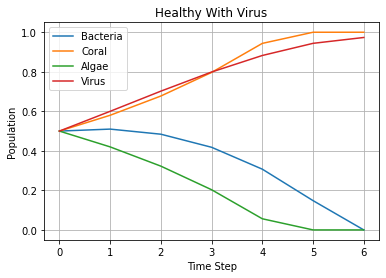

In [57]:
bacteria_counts, coral_counts, algae_counts, virus_counts =  simulate_reef_dynamics(initial_virus=.5,virus_TO_bacteria_inhibition=0.2,
                                                                                    bacteria_TO_virus_support=0.2,)

plt.plot(bacteria_counts, label='Bacteria')
plt.plot(coral_counts, label='Coral')
plt.plot(algae_counts, label='Algae')
plt.plot(virus_counts, label='Virus')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Healthy With Virus')
plt.legend()
plt.grid(True)
plt.savefig("/Users/jacob/Desktop/Research/Knowles/Coral Figures/Healthy, With Virus.pdf", format = "pdf")
plt.show()

# Degraded With Virus

    bacterial_replication=0.2,
    bacteria_TO_coral_inhibition=0.2,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.0,
    virus_TO_bacteria_inhibition=0.02,
    bacteria_TO_virus_support=0.02,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0.5,
    viral_TO_bacterial_support = 0,
    time_steps=6

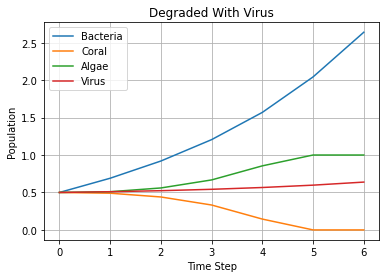

In [58]:
bacteria_counts, coral_counts, algae_counts, virus_counts =  simulate_reef_dynamics(initial_virus=.5,virus_TO_bacteria_inhibition=0.02,
                                                                                    bacteria_TO_virus_support=0.02,bacterial_replication=0.2,
                                                                                    bacteria_TO_coral_inhibition=0.2)

plt.plot(bacteria_counts, label='Bacteria')
plt.plot(coral_counts, label='Coral')
plt.plot(algae_counts, label='Algae')
plt.plot(virus_counts, label='Virus')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Degraded With Virus')
plt.legend()
plt.grid(True)
plt.savefig("/Users/jacob/Desktop/Research/Knowles/Coral Figures/Degraded With Virus.pdf", format = "pdf")
plt.show()

# Healthy With Virus and Metabolism

    bacterial_replication=0.02,
    bacteria_TO_coral_inhibition=0.02,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.2,
    virus_TO_bacteria_inhibition=0.2,
    bacteria_TO_virus_support=0.2,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=.5,
    viral_TO_bacterial_support = 0,
    time_steps=6

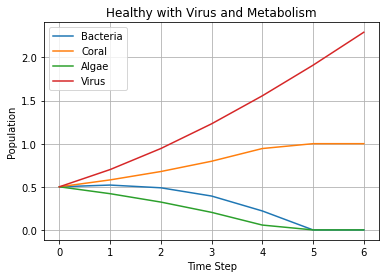

In [59]:
bacteria_counts, coral_counts, algae_counts, virus_counts =  simulate_reef_dynamics(initial_virus=.5,virus_TO_bacteria_inhibition=0.2,
                                                                                    bacteria_TO_virus_support=0.2,bacterial_replication=0.02,
                                                                                    bacteria_TO_coral_inhibition=0.02, viral_TO_bacterial_support=.02,
                                                                                    viral_replication=.2)

plt.plot(bacteria_counts, label='Bacteria')
plt.plot(coral_counts, label='Coral')
plt.plot(algae_counts, label='Algae')
plt.plot(virus_counts, label='Virus')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Healthy with Virus and Metabolism')
plt.legend()
plt.grid(True)
plt.savefig("/Users/jacob/Desktop/Research/Knowles/Coral Figures/Healthy With Virus and Metabolism.pdf", format = "pdf")
plt.show()

# Degraded With Virus and Metabolism

    bacterial_replication=0.2,
    bacteria_TO_coral_inhibition=0.2,
    coral_replication=0.2,
    algae_TO_coral_inhibition=0.02,
    algae_TO_bacteria_support=0.2,
    viral_replication=0.02,
    virus_TO_bacteria_inhibition=0.02,
    bacteria_TO_virus_support=0.02,
    initial_bacteria=0.5,
    initial_coral=0.5,
    initial_algae=0.5,
    initial_virus=0.5,
    viral_TO_bacterial_support = 0.2,
    time_steps=6

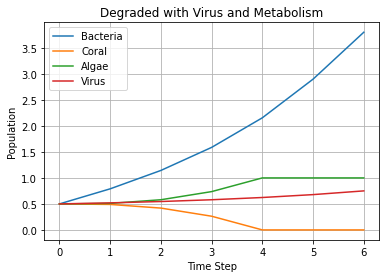

In [60]:
bacteria_counts, coral_counts, algae_counts, virus_counts =  simulate_reef_dynamics(initial_virus=.5,virus_TO_bacteria_inhibition=0.02,
                                                                                    bacteria_TO_virus_support=0.02, bacterial_replication=0.2,
                                                                                    bacteria_TO_coral_inhibition=0.2, viral_TO_bacterial_support=.2,
                                                                                    viral_replication=.02)

plt.plot(bacteria_counts, label='Bacteria')
plt.plot(coral_counts, label='Coral')
plt.plot(algae_counts, label='Algae')
plt.plot(virus_counts, label='Virus')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.title('Degraded with Virus and Metabolism')
plt.legend()
plt.grid(True)
plt.savefig("/Users/jacob/Desktop/Research/Knowles/Coral Figures/Degraded With Virus and Metabolism.pdf", format = "pdf")
plt.show()